# Name: Bitan Paul  || 
Uid: 20BCS6515 || 
Sec: 20AIML2B || 
Date of performance: 28.04.2022 || 
Sub: ML Lab ||

##Aim: 

To implement SVM on a given dataset

##Aparetus: 

1.Google Collab(using python3), 

2.Kaggel for Dataset

##Theory:

###Support Vector Machine(SVM): 
is a supervised machine learning algorithm used for both classification and regression.


###Hyperplanes: 
are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes.

###A kernel: 
a modified version of SVM, called Kernel SVM, is used. Basically, the kernel SVM projects the non-linearly separable data lower dimensions to linearly separable data in higher dimensions in such a way that data points belonging to different classes are allocated to different dimensions.

###C and Gamma:
C is a hypermeter which is set before the training model and used to control error and Gamma is also a hypermeter which is set before the training model and used to give curvature weight of the decision boundary.

###Radial Basis Function(RBF):
where x, x’ are vector point in any fixed dimensional space.
But if we expand the above exponential expression, It will go upto infinite power of x and x’, as expansion of ex contains infinite terms upto infinite power of x hence it involves terms upto infinite powers in infinite dimension.
If we apply any of the algorithms like perceptron Algorithm or linear regression on this kernel, actually we would be applying our algorithm to new infinite-dimensional datapoint we have created. Hence it will give a hyperplane in infinite dimensions, which will give a very strong non-linear classifier or regression curve after returning to our original dimensions.

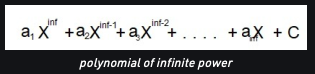


##Code:

Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split (X, y, test_size = 0.25, random_state = 0)

In [ ]:
?train_test_split

Data Visualization

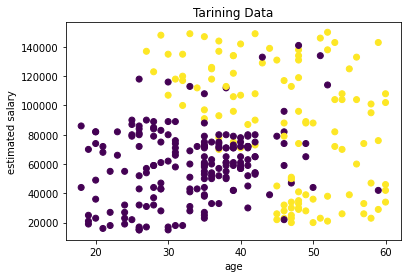

In [ ]:
plt.scatter(X_train[:,0], X_train[:, 1], c = y_train)
plt.xlabel("age")
plt.ylabel("estimated salary")
plt.title("Tarining Data")
plt.show()

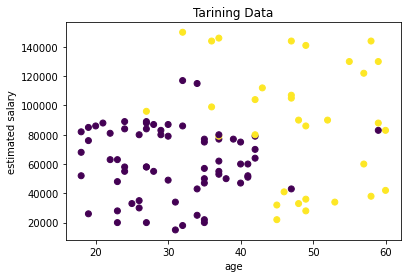

In [ ]:
plt.scatter(X_test[:,0], X_test[:, 1], c = y_test)
plt.xlabel("age")
plt.ylabel("estimated salary")
plt.title("Tarining Data")
plt.show()

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform (X_train)
X_test = sc.fit_transform (X_test)

Applying SVM to the Training set

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

Predicting the Test set results

Output:

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.88

RBF SVM parameters

Radial Basis Function (RBF) kernel SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.93

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', gamma=5, C=7, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.94

Confusion Matrix

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[64,  4],
       [ 2, 30]])

Visualising the Training set results

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.88

CREATE HYPERPLANE

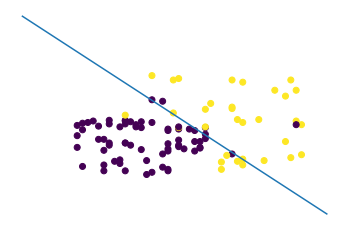

In [ ]:
plt.scatter(X_test[:,0], X_test[:, 1], c = y_test)

w = classifier.coef_[0]
a = - w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a* xx -(classifier.intercept_[0])/ w[1]

plt.plot(xx,yy)
plt.axis("off"),
plt.show();

##Results: 

We have applied support vector classifier on the given dataset & we got a accuracy score of 0.93. 

Here we Firstly imported the dataset and plot it on a scatterplot to understand the relation between the features.

Then observing the plot, we decided to apply a support vector classifier to separate the dataset in two different classes.

But the data was not linearly separable in lower dimentions. So we used a RBF Karnel to plot the data in higher dimentions and make it linearly separable.

Then we applied the support vector classifier on the dataset and got an acuuracy of 0.93

we plotted a confusion matrix as well for better understanding of the results.

##Learning Outcome: 


    1. Learnt the SVM algo
    2. Learnt about different kernels
    3. Learnt how to view different attributes of a function
    4. Learnt how to download and upload dataset
    5. Learnt about Data visualization and Data splitting